# Sheet 03

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


## (2) Visualize Regularization Contours

x.shape: (2, 100), "y.shape:" (1, 100)


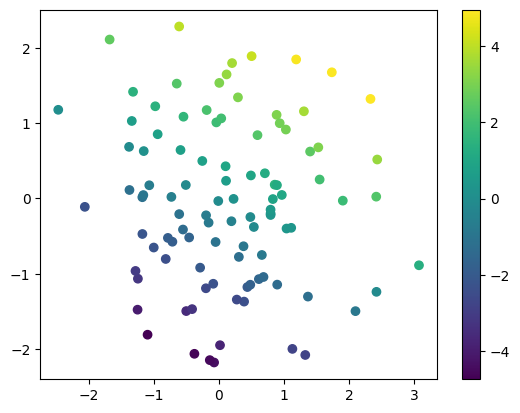

In [3]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'x.shape: {x.shape}, "y.shape:" {y.shape}')
plt.scatter(*x, c=y);
plt.colorbar()
plt.show()

In [4]:
# create a grid of points in the parameter space
b1, b2 = np.linspace(-1, 3, 101), np.linspace(-1, 3, 101)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)
bs.shape

(101, 101, 2)

### (a)

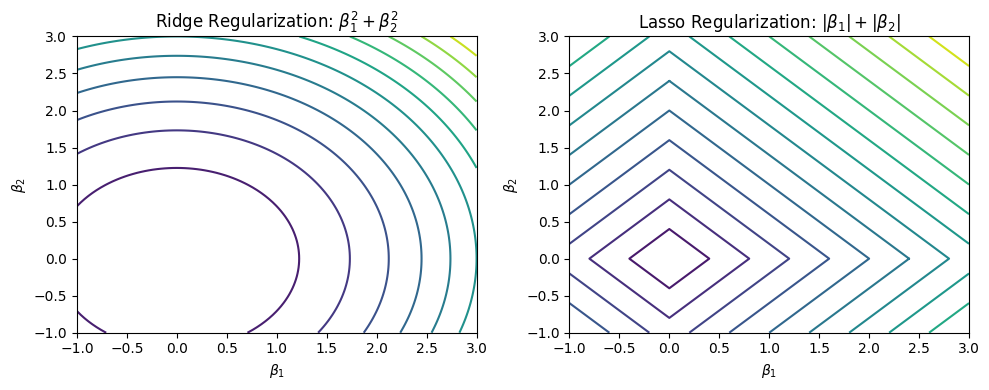

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# extract beta1 and beta2
b1s = bs[..., 0]
b2s = bs[..., 1]

# regularization calculations
ridge = b1s**2 + b2s**2             # Ridge (L2)
lasso = np.abs(b1s) + np.abs(b2s)   # Lasso (L1)

# Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Ridge-contours
ax[0].contour(b1, b2, ridge, levels=15, cmap='viridis')
ax[0].set_title('Ridge Regularization: $\\beta_1^2 + \\beta_2^2$')
ax[0].set_xlabel('$\\beta_1$')
ax[0].set_ylabel('$\\beta_2$')

# Lasso-contours
ax[1].contour(b1, b2, lasso, levels=15, cmap='viridis')
ax[1].set_title('Lasso Regularization: $|\\beta_1| + |\\beta_2|$')
ax[1].set_xlabel('$\\beta_1$')
ax[1].set_ylabel('$\\beta_2$')


plt.tight_layout()
plt.show()

### (b)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


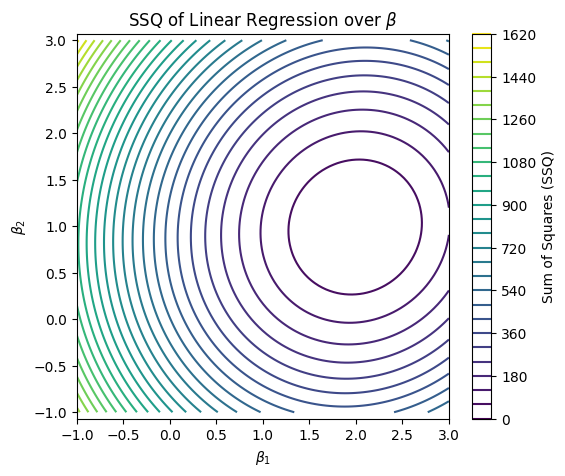

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']

# Auf (n,2) bringen
X = x if (x.ndim == 2 and x.shape[1] == 2) else x.T  # (n,2)
# y eindimensional machen
y = np.asarray(y).squeeze()                           # (n,)

# β-Gitter
b1, b2 = np.linspace(-1, 3, 101), np.linspace(-1, 3, 101)
bs = np.stack(np.meshgrid(b1, b2, indexing='ij'), axis=-1)  # (101,101,2)

# Zentrieren (Intercept separat gedacht)
Xc = X - X.mean(axis=0, keepdims=True)   # (n,2)
yc = y - y.mean()                        # (n,)

# Vorhersage für alle β: (M,M,2) @ (2,n) -> (M,M,n)
pred = bs @ Xc.T

# Residuen & SSQ
res = yc[None, None, :] - pred           # (M,M,n)
ssq = np.sum(res**2, axis=-1)            # (M,M)

# Plot
plt.figure(figsize=(6,5))
cs = plt.contour(b1, b2, ssq, levels=30, cmap='viridis')
plt.colorbar(cs, label='Sum of Squares (SSQ)')
plt.xlabel(r'$\beta_1$'); plt.ylabel(r'$\beta_2$')
plt.title('SSQ of Linear Regression over $\\beta$')
plt.axis('equal'); plt.xlim(-1,3); plt.ylim(-1,3)
plt.show()

#use einsum to compute the ssq?? irgendein fehler in der ausrichtung


### (c)

In [7]:
# TODO: for each lambda, plot both ridge regression and lasso loss functions
lambdas = [0, 10, 50, 100, 200, 300]

C:\Users\piecu\AppData\Local\Temp\ipykernel_15492\1311633739.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


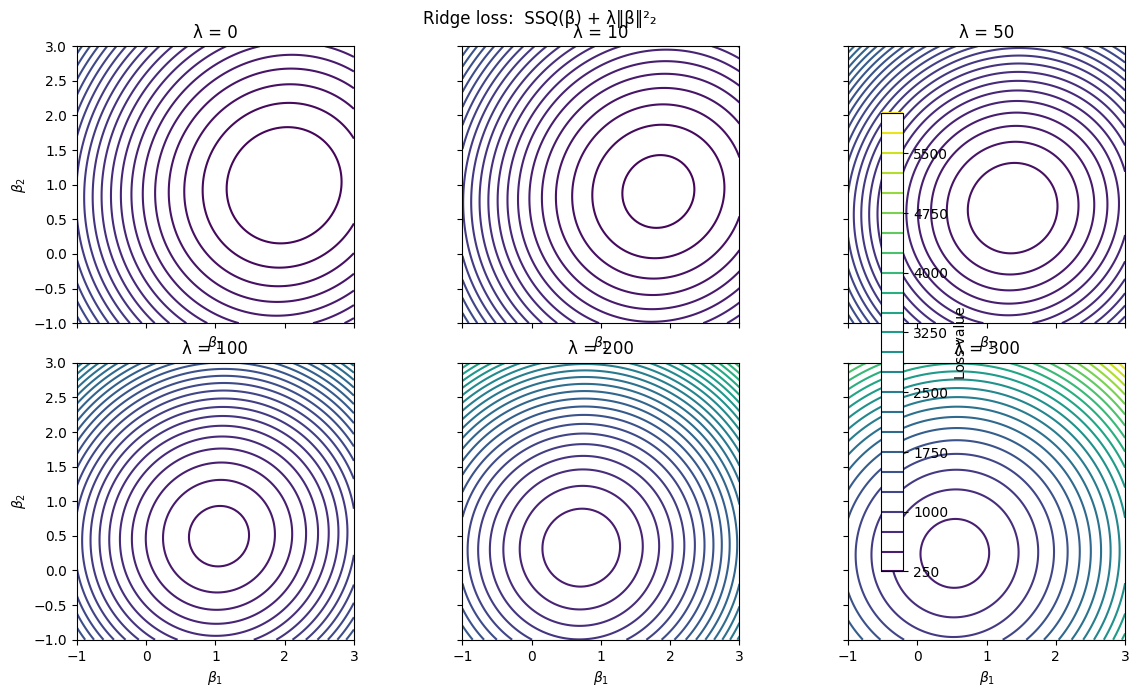

C:\Users\piecu\AppData\Local\Temp\ipykernel_15492\1311633739.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


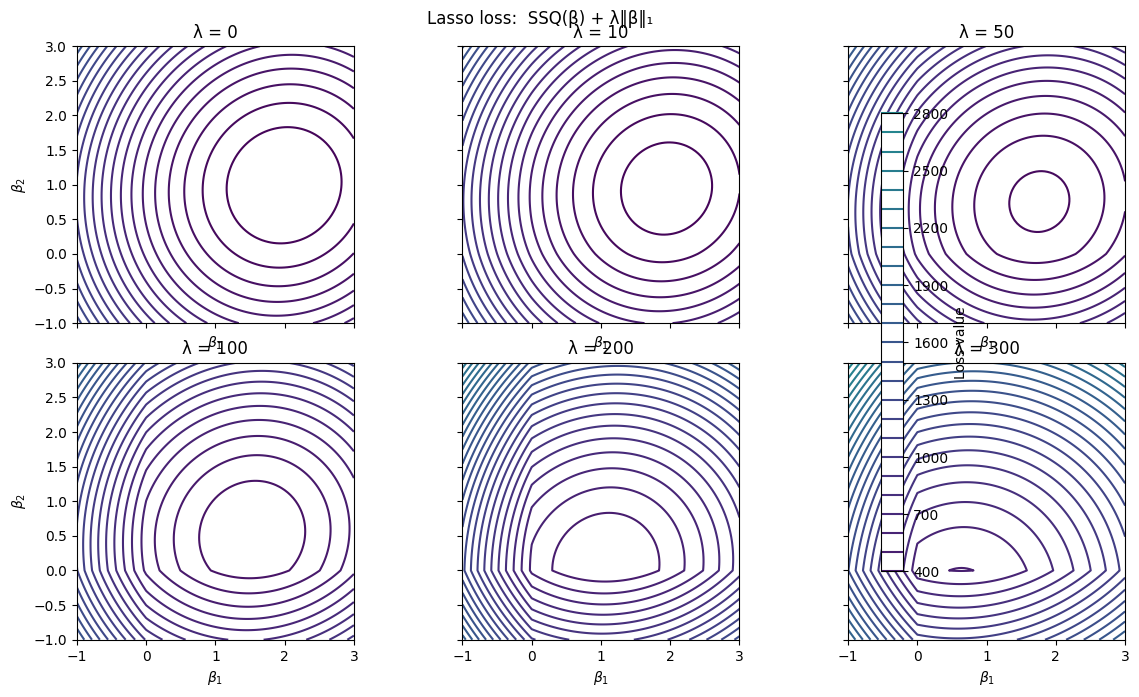

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = x if (x.ndim == 2 and x.shape[1] == 2) else x.T      # (n,2)
y = np.asarray(y).squeeze()                               # (n,)


b1s, b2s = bs[...,0], bs[...,1]

# --- SSQ ---
Xc = X - X.mean(axis=0, keepdims=True)
yc = y - y.mean()
pred = bs @ Xc.T                   # (M,M,n)
res  = yc[None, None, :] - pred    # (M,M,n)
ssq  = np.sum(res**2, axis=-1)     # (M,M)

# --- Penalties ---
ridge_pen = b1s**2 + b2s**2
lasso_pen = np.abs(b1s) + np.abs(b2s)

lambdas = [0, 10, 50, 100, 200, 300]

# Calculate loss
ridge_losses = [ssq + lam * ridge_pen for lam in lambdas]
lasso_losses = [ssq + lam * lasso_pen for lam in lambdas]

# Shared Color Scale
vmin = min(np.min(ridge_losses), np.min(lasso_losses))
vmax = max(np.max(ridge_losses), np.max(lasso_losses))

# ---------------- Ridge ----------------
fig_r, axs_r = plt.subplots(2, 3, figsize=(12, 7), sharex=True, sharey=True)
axs_r = axs_r.ravel()

for ax, lam, loss in zip(axs_r, lambdas, ridge_losses):
    cs = ax.contour(b1, b2, loss, levels=25, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'λ = {lam}')
    ax.set_xlim(-1, 3); ax.set_ylim(-1, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\beta_1$')
axs_r[0].set_ylabel(r'$\beta_2$')
axs_r[3].set_ylabel(r'$\beta_2$')
fig_r.suptitle('Ridge loss:  SSQ(β) + λ‖β‖²₂', y=0.97)
fig_r.colorbar(cs, ax=axs_r, shrink=0.85, label='Loss value')

plt.tight_layout()
plt.show()

# ---------------- Lasso ----------------
fig_l, axs_l = plt.subplots(2, 3, figsize=(12, 7), sharex=True, sharey=True)
axs_l = axs_l.ravel()

for ax, lam, loss in zip(axs_l, lambdas, lasso_losses):
    cs = ax.contour(b1, b2, loss, levels=25, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'λ = {lam}')
    ax.set_xlim(-1, 3); ax.set_ylim(-1, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\beta_1$')
axs_l[0].set_ylabel(r'$\beta_2$')
axs_l[3].set_ylabel(r'$\beta_2$')
fig_l.suptitle('Lasso loss:  SSQ(β) + λ‖β‖₁', y=0.97)
fig_l.colorbar(cs, ax=axs_l, shrink=0.85, label='Loss value')

plt.tight_layout()
plt.show()


Ridge regularization:
At λ=0, the minimum corresponds to the SSQ solution.
As λ penalty term shrinks both coefficients smoothly toward zero, but never exactly to zero.
Unlike Lasso, Ridge regularization preserves both coefficients and only reduces their magnitude proportionally.
This results in circular contour lines that gradually contract toward the origin as regularization strength grows.

Lasso regularization:
For λ=0, the minimum corresponds to the SSQ solution, where both coefficients freely adjust to minimize the residual sum of squares.
As λ increases, the regularization term penalizes large coefficients, which pulls the minimum toward the origin.
At higher λ, one of the coefficients becomes effectively zero, illustrating the sparsity-inducing nature of the Lasso.
The contour shapes gradually change from circular (pure SSQ) to diamond-like, reflecting the influence of the L1 penalty.

## (3) CT Reconstruction
First, set up the design matrix. (Run this once to save it to the disk.)

In [9]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

n_parallel_rays = 70 
n_ray_angles = 30
res = (99, 117)
print("Number of pixels in the 2d image:", np.prod(res))
print("Total number of rays:", n_parallel_rays * n_ray_angles)

def rot_mat(angle):
    c, s = np.cos(angle), np.sin(angle)
    return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

kernel = lambda x: np.exp(-x**2/sigma**2/2)

if not os.path.exists('data/design_matrix.npy'):
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 # np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles

    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

Number of pixels in the 2d image: 11583
Total number of rays: 2100


sino shape: (1, 2100)


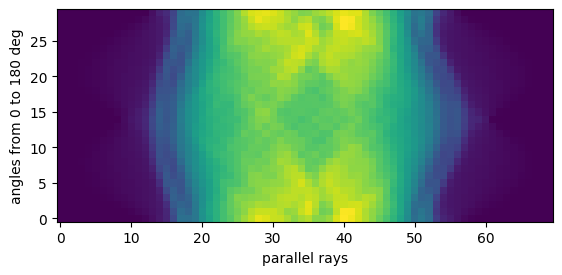

In [10]:
sino = np.load('data/sino.npy')

print(f'sino shape: {sino.shape}')

# visualize sinogram as image
n_parallel_rays = 70
n_angles = 30
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower')
# plt.colorbar()
plt.xlabel('parallel rays')
plt.ylabel('angles from 0 to 180 deg')
plt.show();

### (a)

Design matrix shape: (11583, 2100)


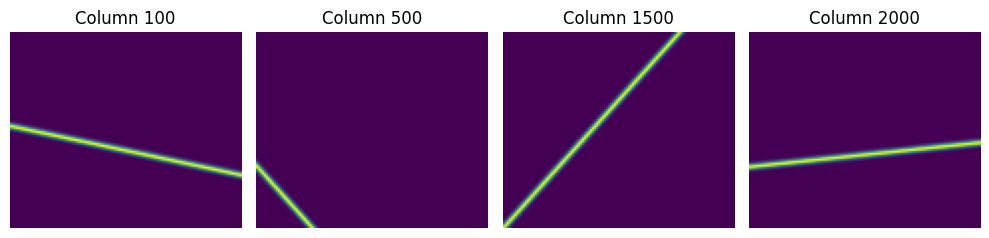

In [11]:
design_matrix = np.load('data/design_matrix.npy')

import numpy as np
import matplotlib.pyplot as plt

# Load design matrix
X = np.load('data/design_matrix.npy')  # shape (num_pixels, num_rays)
res = (99, 117)

print("Design matrix shape:", X.shape)

# Pick four random pixel indices (columns)
cols = [100, 500, 1500, 2000]

fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for i, col in enumerate(cols):
    img = X[:, col].reshape(res)
    axs[i].imshow(img, origin='lower', cmap='viridis')
    axs[i].set_title(f'Column {col}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


# TODO: visualize four random columns as images, using an image shape of (99, 117)

Each column of X corresponds to the sinogram of a single pixel, it shows how that pixel influences all projection measurements across different angles. The bright diagonal lines represent the set of ray positions intersecting that pixel.

### (b)

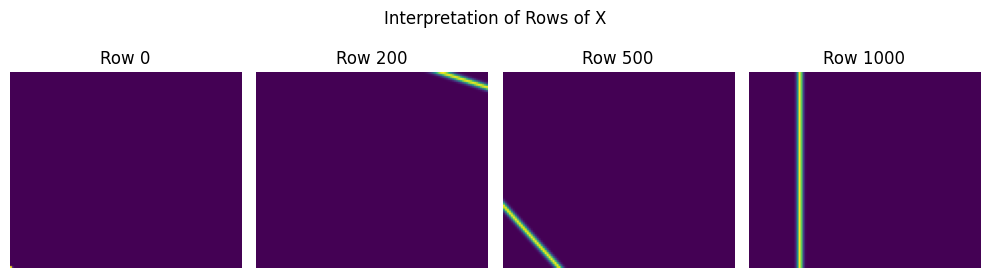

In [13]:
# TODO: visualize four random rows as images
rows = [0, 200, 500, 1000]

fig, axs = plt.subplots(1, 4, figsize=(10, 3))
for i, row in enumerate(rows):
    img = X[:, row].reshape(res)
    axs[i].imshow(img, origin='lower', cmap='viridis')
    axs[i].set_title(f'Row {row}')
    axs[i].axis('off')

plt.suptitle('Interpretation of Rows of X')
plt.tight_layout()
plt.show()
#Das ist falsch 

Each image shows which pixels in the 2D image are intersected by a particular ray. The bright line corresponds to the pixels that most strongly influence that specific measurement in the sinogram.

### (c)

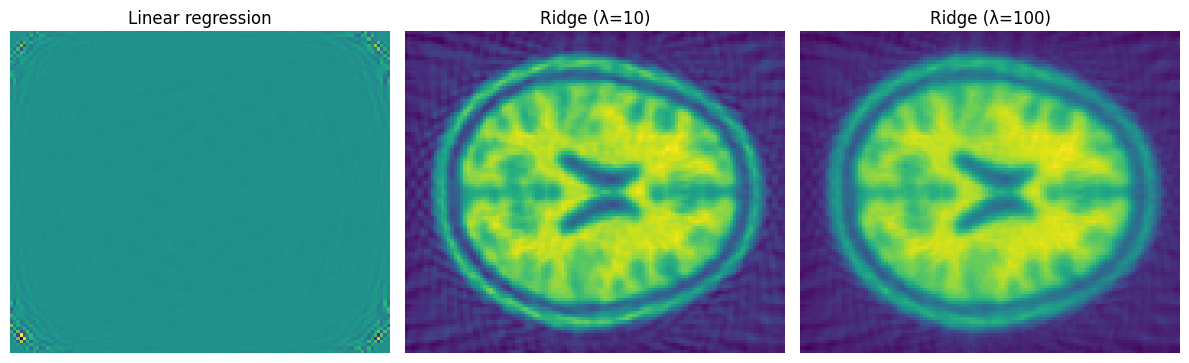

In [14]:

from numpy.linalg import lstsq

# Sinogramm in 1D-Vektor der Länge r bringen
y = np.asarray(sino).squeeze().ravel()  # jetzt 1D
assert y.size == X.shape[1], f"y has length {y.size}, but expected {X.shape[1]} rays."

r = X.shape[1]

# (1) Linear regression:  min ||X.T @ I - y||^2
# A = X.T hat shape (r, p); y hat shape (r,)
I_ls, *_ = np.linalg.lstsq(X.T, y, rcond=None)   # p-Vector
img_ls = I_ls.reshape(res)

# (2) Ridge:  min ||X.T @ I - y||^2 + λ||I||^2
#  I = X @ (X.T @ X + λ I_r)^(-1) @ y   
def ridge_recon(lam):
    Rt = X.T @ X                         # (r, r)
    z  = np.linalg.solve(Rt + lam*np.eye(r), y)
    return (X @ z).reshape(res)

img_r10  = ridge_recon(10.0)
img_r100 = ridge_recon(100.0)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img_ls, cmap='viridis');   axs[0].set_title('Linear regression'); axs[0].axis('off')
axs[1].imshow(img_r10, cmap='viridis');  axs[1].set_title('Ridge (λ=10)');    axs[1].axis('off')
axs[2].imshow(img_r100, cmap='viridis'); axs[2].set_title('Ridge (λ=100)');   axs[2].axis('off')
plt.tight_layout(); plt.show()

